In [41]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [44]:
df = pd.read_csv(os.path.join("..", "Resources", "SampleData2.csv"))
df.head()

,Date,stock,Ticker,sentiment,Start price,End price,volume,change
0,11/7/19,Amazon,AMAZ,-0.05,239,241.5,1605745,1
1,11/7/19,Walmart,WMT,-0.34,268,264.6,4947000,0
2,11/7/19,Target,TGT,-0.05,336,330.0,2903675,0
3,11/7/19,Macy's,M,-0.23,487,484.7,815336,0
4,11/7/19,Staples,STLS,0.28,461,463.8,225490,1


In [45]:
y = df["change"]
y = y.astype('int64', copy=False)
target_names = ["negative", "positive"]
y.describe

<bound method NDFrame.describe of 0     1
1     0
2     0
3     0
4     1
5     1
6     1
7     1
8     0
9     1
10    1
11    0
12    1
13    1
14    1
15    1
16    1
17    0
18    1
19    1
20    0
21    1
22    0
23    0
24    1
25    0
26    0
27    0
28    1
29    1
30    0
31    1
32    0
33    1
34    1
35    0
36    1
37    1
38    0
39    1
40    1
41    0
Name: change, dtype: int64>

In [46]:
X = df.drop(["Date", "stock", "Ticker", "change"], axis=1)


KNN model predictor

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 1.000/0.545
k: 3, Train/Test Score: 0.839/0.545
k: 5, Train/Test Score: 0.710/0.545
k: 7, Train/Test Score: 0.710/0.545
k: 9, Train/Test Score: 0.710/0.545
k: 11, Train/Test Score: 0.677/0.545
k: 13, Train/Test Score: 0.613/0.636
k: 15, Train/Test Score: 0.710/0.545
k: 17, Train/Test Score: 0.613/0.455
k: 19, Train/Test Score: 0.581/0.545


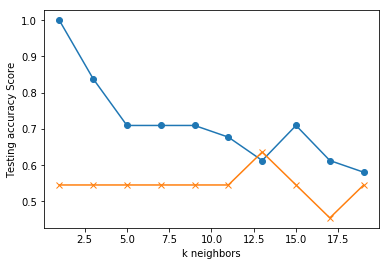

In [48]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [49]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.636


Tree model predictor

In [50]:
target = df["change"]
target_names = ["negative", "positive"]

In [51]:
data = df.drop(["Date", "stock", "Ticker", "change"], axis=1)
feature_names = data.columns

In [52]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9090909090909091

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8181818181818182

In [56]:
PieData = sorted(zip(rf.feature_importances_, feature_names), reverse=True)
PieData

[(0.5435963936609164, 'sentiment'),
 (0.19810719217880784, 'Start price'),
 (0.14400371586101499, 'volume'),
 (0.11429269829926066, 'End price')]